In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


### 데이터 불러오기

In [3]:
df1 = pd.read_parquet('open/train/8.성과정보/201807_train_성과정보.parquet')
df2 = pd.read_parquet('open/train/8.성과정보/201808_train_성과정보.parquet')
df3 = pd.read_parquet('open/train/8.성과정보/201809_train_성과정보.parquet')
df4 = pd.read_parquet('open/train/8.성과정보/201810_train_성과정보.parquet')
df5 = pd.read_parquet('open/train/8.성과정보/201811_train_성과정보.parquet')
df6 = pd.read_parquet('open/train/8.성과정보/201812_train_성과정보.parquet')

### 데이터 합치기

In [5]:
df_performance = pd.concat([df1,df2,df3,df4,df5,df6])

### 세그먼트 칼럼 추가하기

In [7]:
#회원정보 데이터 불러오기
df1 = pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
df2 = pd.read_parquet('open/train/1.회원정보/201808_train_회원정보.parquet')
df3 = pd.read_parquet('open/train/1.회원정보/201809_train_회원정보.parquet')
df4 = pd.read_parquet('open/train/1.회원정보/201810_train_회원정보.parquet')
df5 = pd.read_parquet('open/train/1.회원정보/201811_train_회원정보.parquet')
df6 = pd.read_parquet('open/train/1.회원정보/201812_train_회원정보.parquet')

In [8]:
segment_train = pd.concat([df1,df2,df3,df4,df5,df6])

In [9]:
df_performance['Segment'] = segment_train['Segment'].values

In [10]:
df = df_performance

### 데이터 기본정보 확인하기

In [13]:
df.describe()

,기준년월,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,증감율_이용금액_신판_전월,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
count,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,...,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,2.400000e+06,1.911254e+06,1.844478e+06
mean,2.018095e+05,-2.499633e-02,-2.383989e-02,-1.959183e-02,-8.642645e-02,-1.592283e-02,-2.235531e-02,-2.300829e-03,7.739399e-02,8.808297e-02,...,9.493904e-01,8.766330e-01,9.314377e-01,9.479983e-01,9.385676e-01,-1.006304e-02,3.199591e-03,-3.324818e-03,4.762679e+00,5.534014e+00
std,1.707825e+00,3.206504e-01,3.181794e-01,3.078197e-01,5.119002e-01,1.866209e-01,8.128773e-02,6.779643e-02,4.785608e-01,4.771338e-01,...,2.297757e-01,4.115469e-01,3.048485e-01,2.221469e-01,2.522328e-01,2.427016e-01,2.862019e-01,7.944772e-02,1.824188e+01,1.964868e+01
min,2.018070e+05,-1.999996e+00,-1.999996e+00,-1.999996e+00,-1.999996e+00,-1.999996e+00,-1.199311e+00,-1.999996e+00,-2.004689e+00,-2.004130e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.999996e+00,-1.999996e+00,-1.999996e+00,-2.349918e+00,-2.607296e+00
25%,2.018080e+05,-7.331375e-02,-7.273252e-02,-6.861702e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.780000e-06,1.900000e-05,...,9.999980e-01,9.005240e-01,9.999980e-01,9.999980e-01,9.999980e-01,-7.272741e-02,-5.386280e-02,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.018095e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.875955e-01,1.966753e-01,...,9.999980e-01,9.999980e-01,9.999980e-01,9.999980e-01,9.999980e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.611990e-01,9.851748e-01
75%,2.018110e+05,8.876657e-03,9.142750e-03,1.153946e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.552376e-01,2.579933e-01,...,9.999980e-01,9.999980e-01,9.999980e-01,9.999980e-01,9.999980e-01,3.604638e-02,4.484067e-02,0.000000e+00,2.194942e+00,2.675636e+00
max,2.018120e+05,1.999996e+00,1.999996e+00,1.999996e+00,1.999996e+00,1.999996e+00,7.340224e-01,0.000000e+00,2.004175e+00,2.004175e+00,...,1.540538e+00,1.997502e+00,1.996579e+00,1.999996e+00,2.000152e+00,1.999996e+00,1.999996e+00,1.999996e+00,9.999980e+01,9.999980e+01


In [14]:
#결측치 확인
# df.isnull().sum()

In [15]:
#혜택수혜율_R3M, 혜택수혜율_BOM 결측치 있음 (이후 다시 확인하기)

In [17]:
#세그먼트 분포 확인
df['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

In [18]:
df['Segment'].value_counts(normalize=True)

Segment
E    0.800855
D    0.145517
C    0.053163
A    0.000405
B    0.000060
Name: proportion, dtype: float64

- 세그먼트 불균형 재확인

In [20]:
df.columns

Index(['기준년월', 'ID', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월',
       '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월',
       '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월',
       '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기',
       '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기',
       '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기',
       '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기',
       '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m',
       '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m',
       '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m',
       '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔',
       '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M',
       '혜택수혜율_R3M', '혜택수혜율_B0M', 'Segment'],
      dtype='object')

-> 데이터 컬럼들이 고객의 소비 변화, 한도 소진율, 혜택 반응 등 성과 측정에 활용되는 지표들로 구성되어 있음

## 1. 증감율_평균 이용건수(전월 vs 분기)

In [23]:
# '증감율_이용건수' 관련 컬럼 중 전월 / 분기 구분
prev_month = [col for col in df.columns if '증감율_이용건수' in col and '전월' in col]
quarter = [col for col in df.columns if '증감율_이용건수' in col and '분기' in col]

## 1-1.증감율_평균 이용건수(전월)

In [25]:
prev_month_mean = df.groupby('Segment')[prev_month].mean()
prev_month_mean

,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월
Segment,,,,,,,
A,-0.022701,-0.022406,-0.012217,-0.357792,-5.051027e-02,-0.013933,-0.008230
B,-0.033959,-0.034569,-0.007981,-0.483459,9.353472e-07,-0.052947,0.000000
C,-0.017236,-0.015291,-0.009235,-0.185098,-4.603541e-02,-0.034801,-0.003119
D,-0.024878,-0.023394,-0.017668,-0.166203,-3.310766e-02,-0.033742,-0.002995
E,-0.025533,-0.024488,-0.020633,-0.065214,-1.078506e-02,-0.019462,-0.002118


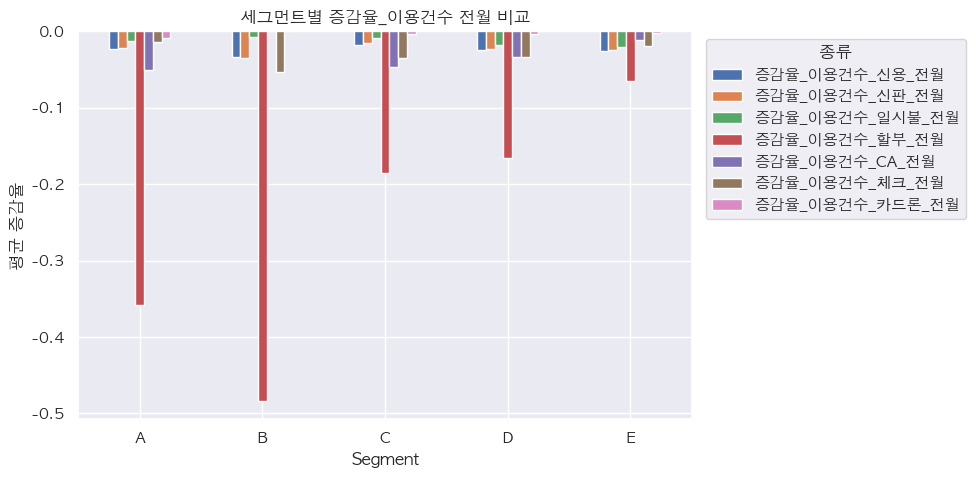

In [26]:
prev_month_mean[prev_month].plot(kind='bar', figsize=(10,5))
plt.title('세그먼트별 증감율_이용건수 전월 비교')
plt.ylabel('평균 증감율')
plt.xticks(rotation=0)
plt.legend(title='종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


- `증감율_이용건수_할부_전월`은 모든 세그먼트에서 가장 가장 큰 음의 증감율을 보임
- 세그먼트 B 할부 이용건수가 가장 큰 감소폭 → 전월 대비 소비 자체가 위축되었거나, 결제 방식 전환 가능성 (체크/일시불 증가 여부 확인 필요)

### 추가) 세그먼트별 기준년월별 증감율 이용건수 추이 파악 (전월)

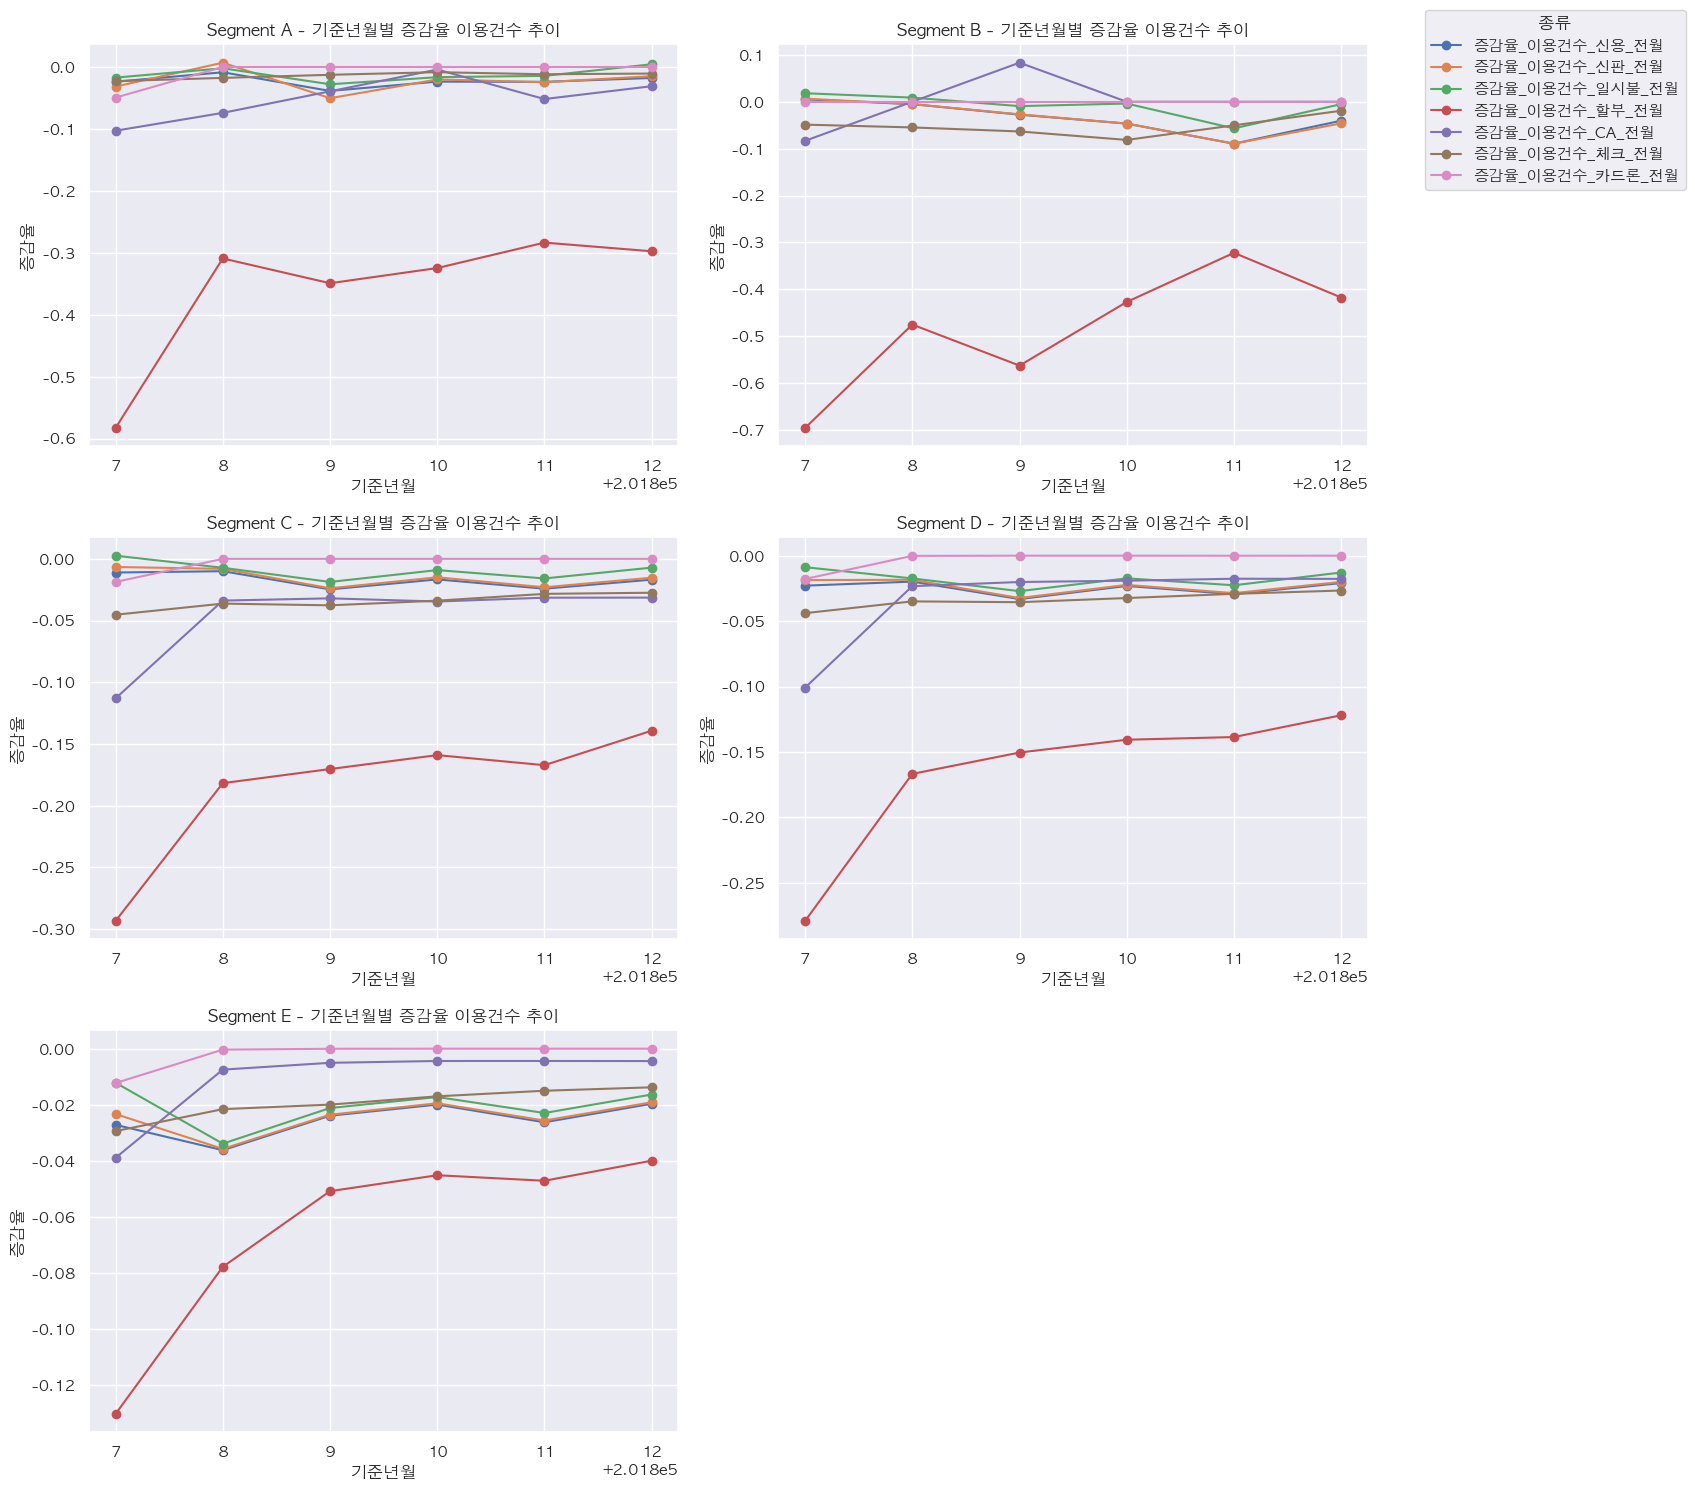

In [29]:
import matplotlib.pyplot as plt

segments = ['A','B','C','D','E']
target_cols = prev_month
n_segments = len(segments)

n_cols = 2
n_rows = (n_segments + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows), sharex=False, sharey=False)
axes = axes.flatten()

for i, seg in enumerate(segments):
    ax = axes[i]
    
    df_seg = df[df['Segment'] == seg]
    df_grouped = df_seg.groupby('기준년월')[target_cols].mean()
    
    lines = df_grouped.plot(ax=ax, marker='o', legend=False)  # 개별 legend 안 보이게
    ax.set_title(f'Segment {seg} - 기준년월별 증감율 이용건수 추이')
    ax.set_ylabel('증감율') 
    ax.grid(True)

# 공통 범례: 마지막에 따로 그리기
handles, labels = lines.get_legend_handles_labels()
fig.legend(handles, labels, title='종류', bbox_to_anchor=(1.02, 1), loc='upper left')

# 남는 subplot 숨기기
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


- 세그먼트 B : `증감율_이용건수_할부_전월`이 가장 낮은 시점에서 시작하며, 가장 큰 하락폭을 보임

## 1-2.증감율_평균 이용건수(분기)

In [32]:
quarter_mean = df.groupby('Segment')[quarter].mean()
quarter_mean

,증감율_이용건수_신용_분기,증감율_이용건수_신판_분기,증감율_이용건수_일시불_분기,증감율_이용건수_할부_분기,증감율_이용건수_CA_분기,증감율_이용건수_체크_분기,증감율_이용건수_카드론_분기
Segment,,,,,,,
A,-0.052678,-0.055505,-0.046397,-0.233851,0.029378,-0.031659,-0.051440
B,-0.068377,-0.062524,-0.061797,-0.036010,0.020176,0.118946,0.000000
C,-0.060948,-0.062567,-0.056563,-0.229102,-0.026370,-0.026377,-0.047919
D,-0.080868,-0.081125,-0.074455,-0.263522,-0.039701,-0.031583,-0.044502
E,-0.073051,-0.072977,-0.064366,-0.166610,-0.015848,-0.019541,-0.026929


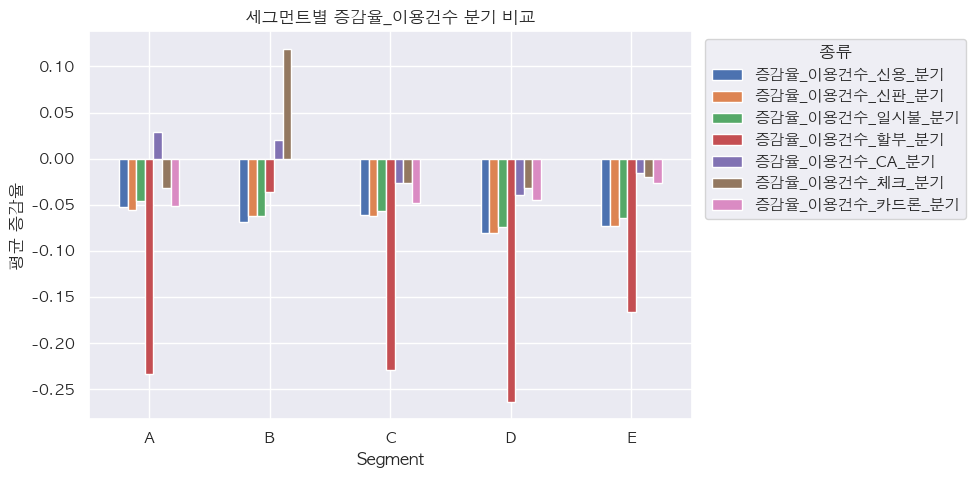

In [33]:
quarter_mean[quarter].plot(kind='bar', figsize=(10,5))
plt.title('세그먼트별 증감율_이용건수 분기 비교')
plt.ylabel('평균 증감율')
plt.xticks(rotation=0)
plt.legend(title='종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


- 모든 세그먼트에서 `증감율_이용건수_할부_분기`는 큰 폭으로 감소 (세그먼트 B는 상대적으로 낮음)
- 세그먼트 B는 체크카드 이용이 유일하게 증가한 세그먼트 (체크카드 증감율이 +0.1 이상으로 뚜렷하게 증가)
- 세그먼트 A,B는 현금서비스 평균 이용률이 양의 값을 가진다는 점에서 두드러짐
- 세그먼트 B는 **최근 1개월 사이 급격한 소비 감소(할부 이용)**가 있었지만,3개월 기준으로는 큰 변화가 없는 세그먼트

## 2. 증감율_이용금액 (전월 vs 분기)

In [36]:
# '증감율_이용금액' 관련 컬럼 중 전월 / 분기 구분
prev_month = [col for col in df.columns if '증감율_이용금액' in col and '전월' in col]
quarter = [col for col in df.columns if '증감율_이용금액' in col and '분기' in col]

## 2-1.증감율_평균 이용금액(전월)

In [38]:
## 증감율_이용금액 '전월'
# '증감율_이용건수' 관련 컬럼 중 전월 / 분기 구분
prev_month_mean = df.groupby('Segment')[prev_month].mean()
prev_month_mean

,증감율_이용금액_신용_전월,증감율_이용금액_신판_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용금액_CA_전월,증감율_이용금액_체크_전월,증감율_이용금액_카드론_전월
Segment,,,,,,,
A,0.069530,0.174623,0.174336,-0.088483,-0.016610,-0.014250,-0.010288
B,0.080298,0.235148,0.245190,-0.104895,-0.002821,-0.040875,0.000000
C,0.117898,0.170542,0.172224,-0.060475,-0.011647,-0.019354,-0.003402
D,0.131808,0.158760,0.161274,-0.066523,-0.012895,-0.014374,-0.003207
E,0.064822,0.069712,0.074736,-0.037975,-0.007085,-0.007395,-0.002199


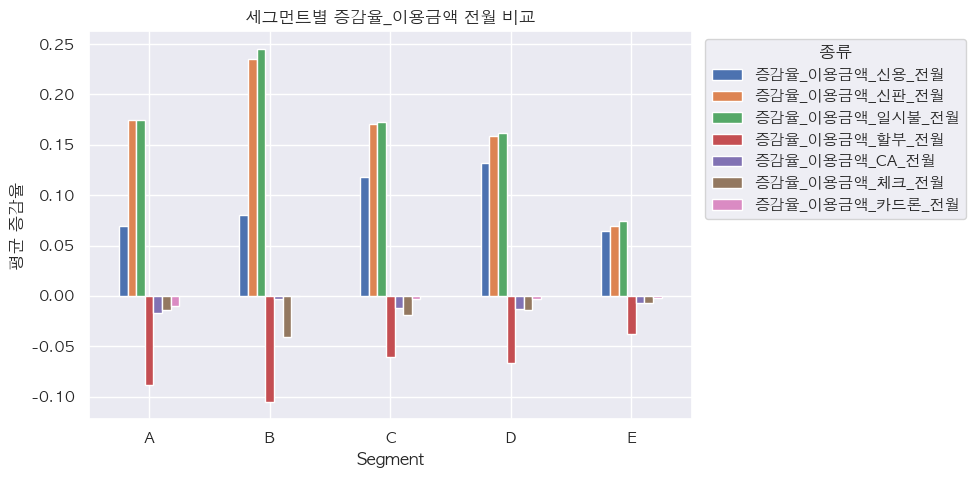

In [39]:
prev_month_mean[prev_month].plot(kind='bar', figsize=(10,5))
plt.title('세그먼트별 증감율_이용금액 전월 비교')
plt.ylabel('평균 증감율')
plt.xticks(rotation=0)
plt.legend(title='종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

- 세그먼트 B의 일시불 증감율이 가장 높음
- `증감율_이용금액_신용_전월` 세그먼트 D가 뚜렷하게 높음 
- 모든 세그먼트에서 할부, CA, 체크, 카드론은 음의 증가율을 나타냄
- 카드론은 모든 세그먼트 영역에서 0과 가까운 수치를 보임

## 2-2.증감율_평균 이용금액(분기)

In [42]:
quarter

['증감율_이용금액_신용_분기',
 '증감율_이용금액_신판_분기',
 '증감율_이용금액_일시불_분기',
 '증감율_이용금액_할부_분기',
 '증감율_이용금액_CA_분기',
 '증감율_이용금액_체크_분기',
 '증감율_이용금액_카드론_분기']

In [43]:
quarter_mean = df.groupby('Segment')[quarter].mean()
quarter_mean

,증감율_이용금액_신용_분기,증감율_이용금액_신판_분기,증감율_이용금액_일시불_분기,증감율_이용금액_할부_분기,증감율_이용금액_CA_분기,증감율_이용금액_체크_분기,증감율_이용금액_카드론_분기
Segment,,,,,,,
A,-0.237204,-0.249801,-0.175307,-0.201946,-0.031013,-0.031779,-0.051440
B,-0.275444,-0.243896,-0.163679,-0.122885,-0.023672,0.107892,0.000000
C,-0.144118,-0.142344,-0.102753,-0.170244,-0.046250,-0.026361,-0.048311
D,-0.156727,-0.154404,-0.115609,-0.191534,-0.042348,-0.031458,-0.045172
E,-0.126866,-0.126941,-0.100277,-0.126159,-0.013511,-0.019540,-0.027420


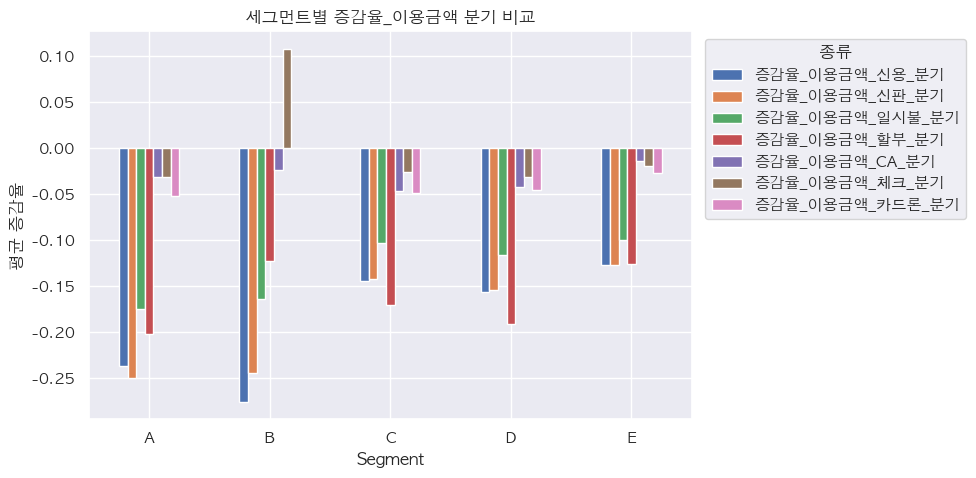

In [44]:
quarter_mean[quarter].plot(kind='bar', figsize=(10,5))
plt.title('세그먼트별 증감율_이용금액 분기 비교')
plt.ylabel('평균 증감율')
plt.xticks(rotation=0)
plt.legend(title='종류', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

- 체크카드 항목만 분기 기준 세그먼트 B에서 유일한 양의 증감율을 보임
- 세그먼트 E는 전월/분기 모든 항목에서 증감폭이 작음

## 3. 잔액_신판평균한도소진율 (r3m vs r6m)

In [47]:
df.columns

Index(['기준년월', 'ID', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월',
       '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월',
       '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월',
       '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기',
       '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기',
       '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기',
       '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기',
       '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m',
       '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m',
       '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m',
       '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔',
       '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M',
       '혜택수혜율_R3M', '혜택수혜율_B0M', 'Segment'],
      dtype='object')

In [48]:
limit_used_r3m_mean = df.groupby('Segment')['잔액_신판평균한도소진율_r3m'].mean()

In [49]:
limit_used_r3m_mean

Segment
A    0.211269
B    0.339271
C    0.210329
D    0.200274
E    0.112022
Name: 잔액_신판평균한도소진율_r3m, dtype: float64

In [50]:
'잔액_신판평균한도소진율_r6m','잔액_신판평균한도소진율_r3m'

('잔액_신판평균한도소진율_r6m', '잔액_신판평균한도소진율_r3m')

In [51]:
limit_used_r6m_mean = df.groupby('Segment')['잔액_신판평균한도소진율_r6m'].mean()

In [52]:
limit_used_r6m_mean

Segment
A    0.221615
B    0.344336
C    0.215443
D    0.207479
E    0.118663
Name: 잔액_신판평균한도소진율_r6m, dtype: float64

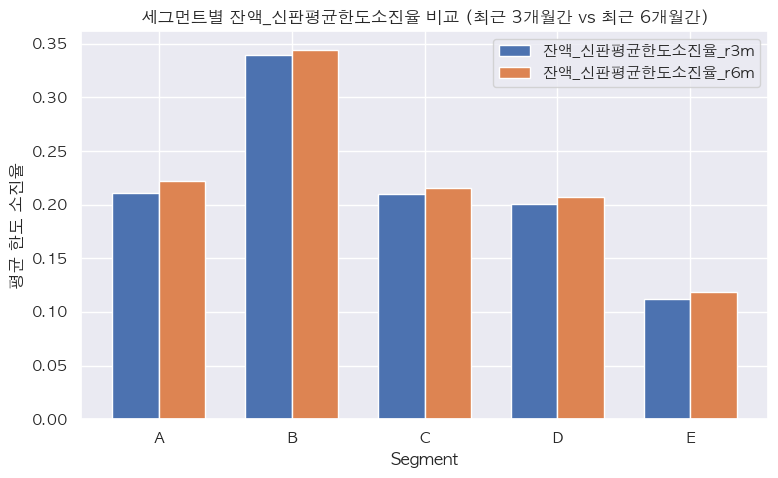

In [53]:
# 데이터프레임 생성 
df_compare = pd.DataFrame({
    'r3m': limit_used_r3m_mean,
    'r6m': limit_used_r6m_mean
}).reset_index()

# 위치 조정용 x축 index
x = np.arange(len(df_compare))  # A~E = [0,1,2,3,4]
width = 0.35

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, df_compare['r3m'], width=width, label='잔액_신판평균한도소진율_r3m')
plt.bar(x + width/2, df_compare['r6m'], width=width, label='잔액_신판평균한도소진율_r6m')
plt.xticks(x, df_compare['Segment'])  
plt.xlabel('Segment')
plt.ylabel('평균 한도 소진율')
plt.title('세그먼트별 잔액_신판평균한도소진율 비교 (최근 3개월간 vs 최근 6개월간)')
plt.legend()
plt.tight_layout()
plt.show()


- 잔액_신판평균한도소진율 : 신용카드 결제 시 사용 가능한 한도 대비 실제 사용 잔액의 비율을 의미
- 소진율↑ ⇒ 잔액↓ ⇒ 소비↑ ⇒ 리스크↑ 가능성
- 소진율↓ ⇒ 잔액↑ ⇒ 소비↓ ⇒ 안정/보수적
- 세그먼트 B는 잔액_신판평균한도소진율이 가장 높고, 이와 반대로 세그먼트 E는 소진율이 가장 낮음
- 최근 3개월간/ 6개월간의 평균 소진율을 비교한 결과, 전반적으로 세그먼트 간 큰 편차 없이 유사한 경향성을 보임

## 4. 잔액_신판최대한도소진율 (r3m vs r6m)

In [56]:
#잔액_신판최대한도소진율 r3m 평균
max_used_r3m_mean = df.groupby('Segment')['잔액_신판최대한도소진율_r3m'].mean()
max_used_r3m_mean

Segment
A    0.269417
B    0.410777
C    0.261605
D    0.246833
E    0.139390
Name: 잔액_신판최대한도소진율_r3m, dtype: float64

In [57]:
#잔액_신판최대한도소진율 r6m 평균
max_used_r6m_mean = df.groupby('Segment')['잔액_신판최대한도소진율_r6m'].mean()
max_used_r6m_mean

Segment
A    0.344319
B    0.481442
C    0.314316
D    0.296500
E    0.171697
Name: 잔액_신판최대한도소진율_r6m, dtype: float64

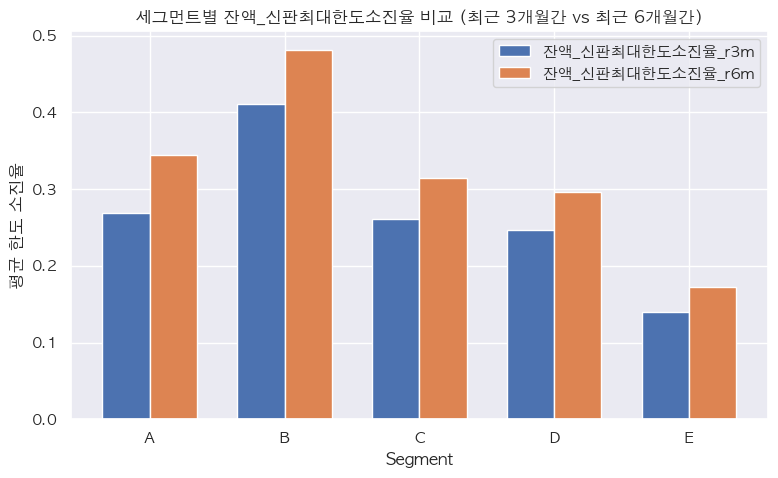

In [58]:
# 데이터프레임 생성 
df_compare = pd.DataFrame({
    'r3m': max_used_r3m_mean,
    'r6m': max_used_r6m_mean
}).reset_index()

# 위치 조정용 x축 index
x = np.arange(len(df_compare))  # A~E = [0,1,2,3,4]
width = 0.35

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, df_compare['r3m'], width=width, label='잔액_신판최대한도소진율_r3m')
plt.bar(x + width/2, df_compare['r6m'], width=width, label='잔액_신판최대한도소진율_r6m')
plt.xticks(x, df_compare['Segment'])  
plt.xlabel('Segment')
plt.ylabel('평균 한도 소진율')
plt.title('세그먼트별 잔액_신판최대한도소진율 비교 (최근 3개월간 vs 최근 6개월간)')
plt.legend()
plt.tight_layout()
plt.show()

- 잔액_신판최대한도소진율 : 신용카드(신판) 한도 사용률을 의미, 사용자가 신용카드의 총 한도 중 실제로 사용한 금액의 비율을 나타냄
- 소진율이 높을수록 신용카드 사용이 활발하다는 것을 의미하며, 반대로 소진율이 낮을수록 신용카드 사용 빈도가 낮다는 것을 의미함
- 최근 3개월간/6개월간 세그먼트 B의 신용카드 사용이 높음을 알 수 있으며, 이와 반대로 E가 가장 낮은 소진율을 보임

## 5. 잔액_신판ca평균한도소진율 (r3m vs r6m)

In [61]:
#잔액_신판ca평균한도소진율 r3m 평균
ca_r3m_mean = df.groupby('Segment')['잔액_신판ca평균한도소진율_r3m'].mean()
ca_r3m_mean

Segment
A    0.355069
B    0.561380
C    0.300528
D    0.247573
E    0.123618
Name: 잔액_신판ca평균한도소진율_r3m, dtype: float64

In [62]:
#잔액_신판ca평균한도소진율 r6m 평균
ca_r6m_mean = df.groupby('Segment')['잔액_신판ca평균한도소진율_r6m'].mean()
ca_r6m_mean

Segment
A    0.361952
B    0.570302
C    0.308180
D    0.257187
E    0.131031
Name: 잔액_신판ca평균한도소진율_r6m, dtype: float64

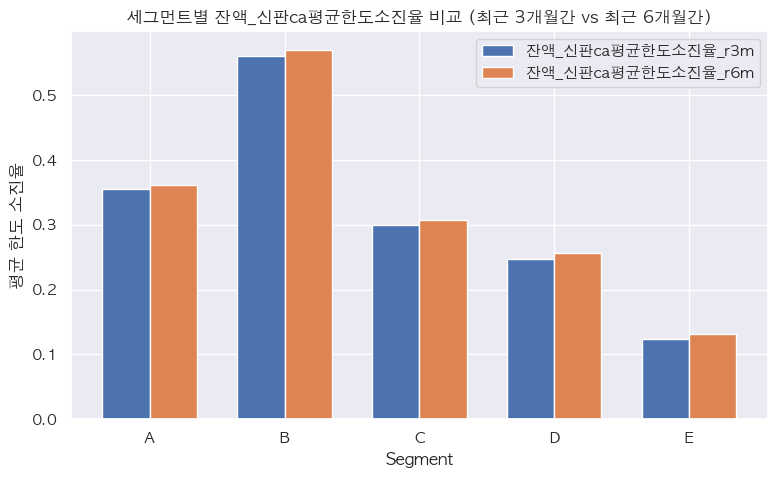

In [63]:
# 데이터프레임 생성 
df_compare = pd.DataFrame({
    'r3m': ca_r3m_mean,
    'r6m': ca_r6m_mean
}).reset_index()

# 위치 조정용 x축 index
x = np.arange(len(df_compare))  # A~E = [0,1,2,3,4]
width = 0.35

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, df_compare['r3m'], width=width, label='잔액_신판ca평균한도소진율_r3m')
plt.bar(x + width/2, df_compare['r6m'], width=width, label='잔액_신판ca평균한도소진율_r6m')
plt.xticks(x, df_compare['Segment'])  
plt.xlabel('Segment')
plt.ylabel('평균 한도 소진율')
plt.title('세그먼트별 잔액_신판ca평균한도소진율 비교 (최근 3개월간 vs 최근 6개월간)')
plt.legend()
plt.tight_layout()
plt.show()

## 6. 잔액_신판ca최대한도소진율 (r3m vs r6m)

In [65]:
#잔액_신판ca최대한도소진율 r3m 평균
ca_max_r3m_mean = df.groupby('Segment')['잔액_신판ca최대한도소진율_r3m'].mean()
ca_max_r3m_mean

Segment
A    0.429040
B    0.666999
C    0.367254
D    0.303438
E    0.154297
Name: 잔액_신판ca최대한도소진율_r3m, dtype: float64

In [66]:
#잔액_신판ca최대한도소진율 r6m 평균
ca_max_r6m_mean = df.groupby('Segment')['잔액_신판ca최대한도소진율_r6m'].mean()
ca_max_r6m_mean

Segment
A    0.508625
B    0.741294
C    0.426523
D    0.356905
E    0.186943
Name: 잔액_신판ca최대한도소진율_r6m, dtype: float64

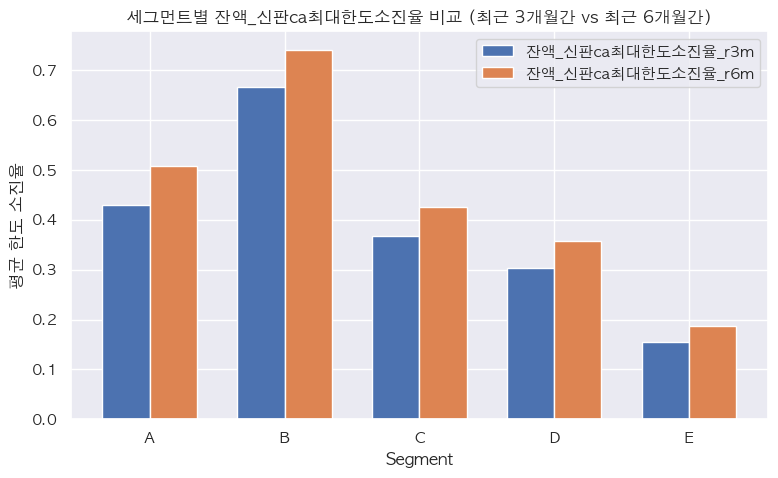

In [67]:
# 데이터프레임 생성 
df_compare = pd.DataFrame({
    'r3m': ca_max_r3m_mean,
    'r6m': ca_max_r6m_mean
}).reset_index()

# 위치 조정용 x축 index
x = np.arange(len(df_compare))  # A~E = [0,1,2,3,4]
width = 0.35

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, df_compare['r3m'], width=width, label='잔액_신판ca최대한도소진율_r3m')
plt.bar(x + width/2, df_compare['r6m'], width=width, label='잔액_신판ca최대한도소진율_r6m')
plt.xticks(x, df_compare['Segment'])  
plt.xlabel('Segment')
plt.ylabel('평균 한도 소진율')
plt.title('세그먼트별 잔액_신판ca최대한도소진율 비교 (최근 3개월간 vs 최근 6개월간)')
plt.legend()
plt.tight_layout()
plt.show()

- 세그먼트 B는 잔액_신판ca평균한도소진율과 잔액_신판ca최대한도소진율 모두 매우 높음
- 세그먼트 E는 CA를 거의 사용하지 않음 (비교적 신용건정성이 높을 것임)

## 7. 변동률_평잔 

In [70]:
#변동률_평잔 칼럼만 고르기
avg_balance = [col for col in df.columns if '변동률_' and '평잔' in col]
avg_balance

['변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔', '변동률_카드론평잔']

In [71]:
avg_balance_mean = df.groupby('Segment')[avg_balance].mean()
avg_balance_mean

,변동률_일시불평잔,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔
Segment,,,,,,
A,0.930912,1.002269,0.920529,0.977746,0.999966,0.994454
B,0.939222,1.011517,0.964580,0.988420,0.999998,0.917696
C,0.946812,1.001592,0.904314,0.958459,0.998588,0.976035
D,0.939715,1.001391,0.887476,0.962183,0.997581,0.979225
E,0.887152,0.936445,0.872796,0.924030,0.935601,0.928666


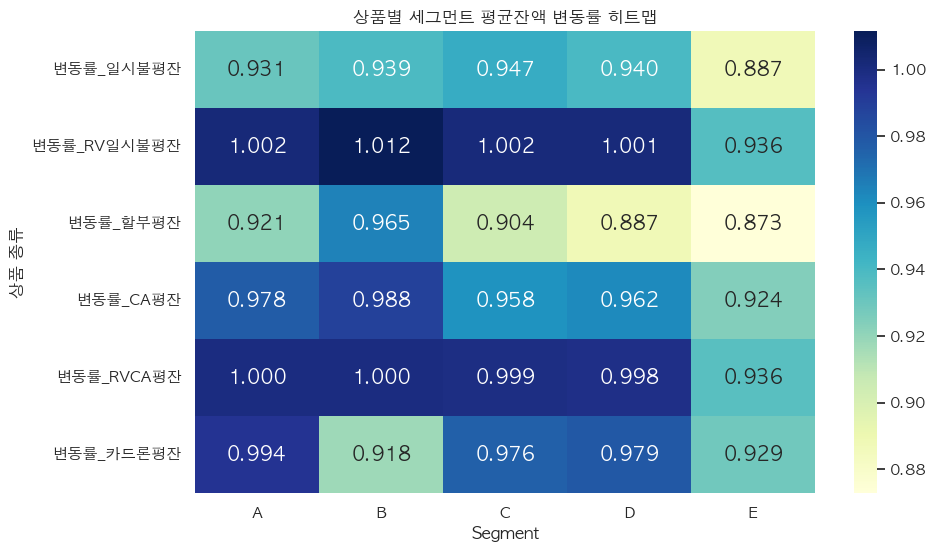

In [72]:
#히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(avg_balance_mean.T, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('상품별 세그먼트 평균잔액 변동률 히트맵')
plt.xlabel('Segment')
plt.ylabel('상품 종류')  
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

- 세그먼트 E는 전 상품군에서 전반적으로 가장 낮은 변동률을 보임
- 세그먼트 B는 대부분의 항목에서 높은 수치를 보임


## 8. 변동률_잔액_B1M(1개월 전 대비)

In [75]:
balance_cols = ['변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M']        

In [76]:
balance_cols_mean = df.groupby('Segment')[balance_cols].mean()
balance_cols_mean

,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M
Segment,,,
A,-0.047325,-0.007230,-0.013129
B,-0.006460,0.040312,-0.008916
C,-0.007943,0.008436,-0.006527
D,-0.007907,0.003712,-0.004978
E,-0.010577,0.002761,-0.002806


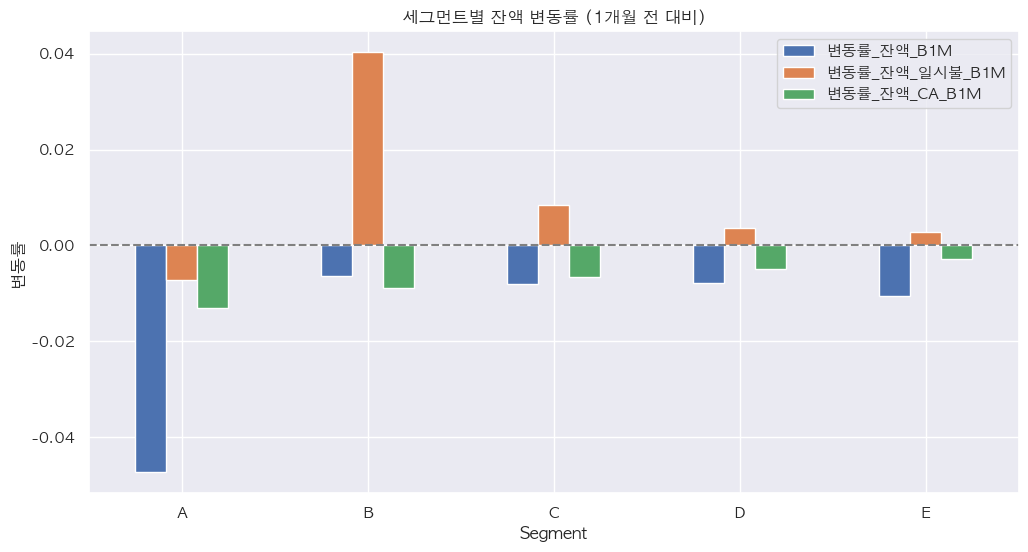

In [77]:
#시각화
balance_cols_mean.plot(kind='bar')
plt.title('세그먼트별 잔액 변동률 (1개월 전 대비)')
plt.xlabel('Segment')
plt.ylabel('변동률')
plt.xticks(rotation=0)
plt.axhline(0, color='gray', linestyle='--')  #
plt.show()

- 세그먼트 A `변동률_잔액_B1M` 가장 큰 감소폭 (세그먼트 A의 전체 카드 잔액이 1개월 전 대비 가장 많이 감소)
- 세그먼트 B `변동률_잔액_일시불_B1M` 가장 큰 증가폭 (세그먼트 B의 일시불 결제 잔액이 1개월 전 대비 가장 많이 증가)

## 9. 혜택수혜율

- 혜택수혜율과 관련된 컬럼은 총 2가지 (`혜택수혜율_R3M`, `혜택수혜율_B0M`)

In [81]:
#컬럼 결측치 확인

In [82]:
df['혜택수혜율_R3M'].isnull().sum()

488746

In [83]:
df['혜택수혜율_B0M'].isnull().sum()

555522

In [84]:
# 결측치 비율 파악하기
total_rows = len(df)
missing_r3m_ratio = ( df['혜택수혜율_R3M'].isnull().sum() / total_rows) * 100
missing_b0m_ratio = ( df['혜택수혜율_B0M'].isnull().sum() / total_rows )* 100

print(f'혜택수혜율_R3M 결측치 비율: {missing_r3m_ratio:.2f}%')
print(f'혜택수혜율_B0M 결측치 비율: {missing_b0m_ratio:.2f}%')


혜택수혜율_R3M 결측치 비율: 20.36%
혜택수혜율_B0M 결측치 비율: 23.15%


In [85]:
#결측치 행 제거
df.dropna(subset=['혜택수혜율_R3M', '혜택수혜율_B0M'], inplace=True)

In [86]:
benefit_r3m_mean = df.groupby('Segment')['혜택수혜율_R3M'].mean()
benefit_r3m_mean

Segment
A    1.286058
B    1.256218
C    1.310655
D    1.566831
E    5.979904
Name: 혜택수혜율_R3M, dtype: float64

In [87]:
benefit_b0m_mean = df.groupby('Segment')['혜택수혜율_B0M'].mean()
benefit_b0m_mean 

Segment
A    1.357080
B    1.345449
C    1.584308
D    1.950862
E    6.719687
Name: 혜택수혜율_B0M, dtype: float64

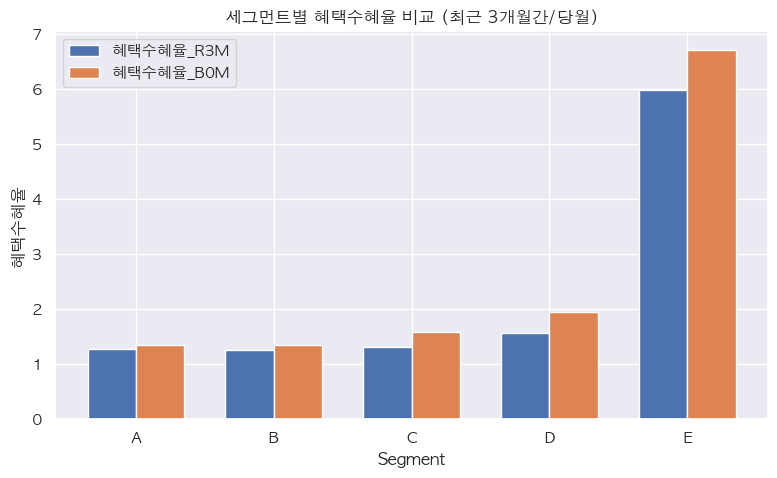

In [88]:
# 데이터프레임 생성 
df_compare = pd.DataFrame({
    'r3m': benefit_r3m_mean,
    'b0m': benefit_b0m_mean
}).reset_index()

# 위치 조정용 x축 index
x = np.arange(len(df_compare))  # A~E = [0,1,2,3,4]
width = 0.35

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, df_compare['r3m'], width=width, label='혜택수혜율_R3M')
plt.bar(x + width/2, df_compare['b0m'], width=width, label='혜택수혜율_B0M')
plt.xticks(x, df_compare['Segment'])  
plt.xlabel('Segment')
plt.ylabel('혜택수혜율')
plt.title('세그먼트별 혜택수혜율 비교 (최근 3개월간/당월)')
plt.legend()
plt.tight_layout()
plt.show()

- 혜택수혜율: (혜택 총액 / 총 지출액) * 100
- 최근 3개월간 / 당월모두 세그먼트 E의 혜택수혜율이 압도적으로 높음

## 총정리

| 세그먼트  | 증감율_이용건수<br>(전월/분기)               | 증감율_이용금액<br>(전월/분기)        | 잔액_한도소진율<br>(평균/최대) | 잔액_CA한도소진율    | 변동률_평잔 | 변동률_B1M<br> | 혜택수혜율    |
| ----- | -------------------------------- | ---------------------- | ---------------- | --------- | ------ | --------------- | -------- |
| **A** |전월- 할부 이용건수 가장 큰 감소 <br> 분기 -현금서비스 이용 양(+) | -               | 중간               | 높음        | 낮음     | *변동률_잔액_B1M* 가장 큰 감소폭 | 낮음       |
| **B** |전월- 할부 이용건수 가장 큰 감소<br>분기- 체크카드 이용만 증가   | 전월 - 일시불 증가폭 최대<br>분기 -신용 증가 뚜렷 | 평균/최대 모두 가장 높음   | 매우 높음     | 높음     | *변동률_잔액_일시불_B1M* 가장 큰 증가폭 | 낮음       |
| **C** | 전반적 감소                           | -        | 평균/최대 중간 수준      | 낮음        | 중간     | 전체 소폭 감소        | 낮음       |
| **D** | 전반적 감소                           | 전월 - 신용 이용금액 증가 뚜렷          | 평균/최대 중간 수준      | 낮음        | 중간     | 전체 소폭 감소        | 낮음       |
| **E** | 증감폭 작음 (안정적)                     | 전월/분기 모두 증감폭 적음         | 평균/최대 모두 가장 낮음   | 거의 사용 안 함 | 가장 낮음  | 전반적 감소          | 압도적 높음 |


### 피처 선택 요약표 (세그먼트 분류용)

| **카테고리**         | **추천 피처명 예시**                                                | **선택 이유 (정보력)**                                     |
| ---------------- | ------------------------------------------------------------ | --------------------------------------------------- |
| **증감율_이용건수 (전월/분기)**     | `증감율_이용건수_할부_전월`, `증감율_이용건수_할부_분기`, `증감율_이용건수_체크_전월`, `증감율_이용건수_체크_분기`         | A, B가 명확히 감소 / B만 체크카드 증가 |
| **증감율_이용금액 (전월/분기)**     | `증감율_이용금액_일시불_전월`, `증감율_이용금액_신용_전월`, `증감율_이용금액_체크_분기`        | B: 일시불 증가 / D: 신용 증가 / B만 체크카드 증가   |
| **잔액_한도소진율 지표**     | `잔액_신판평균한도소진율_R3M`, `잔액_신판최대한도소진율_R3M`, `잔액_신판CA평균한도소진율_R6M`등 | B: 가장 높음 / E: 가장 낮음    |
| **변동률_평잔**       | `변동률_일시불평잔`, `변동률_CA평잔`, `변동률_카드론평잔`                         | B는 대부분 항목에서 높고 E는 낮음     |
| **변동률_B1M(1개월 전 대비)** | `변동률_잔액_B1M`, `변동률_잔액_일시불_B1M`, `변동률_잔액_CA_B1M`              | A: 전체 카드잔액 급감 / B: 일시불 급증 
| **혜택수혜율**        | `혜택수혜율_R3M`, `혜택수혜율_B0M`                                     | E: 압도적으로 높음 / A\~D: 낮음           |


## 08_성과정보 인사이트 모음

#### 증감율_평균 이용건수 전월
- `증감율_이용건수_할부_전월`은 모든 세그먼트에서 가장 가장 큰 음의 증감율을 보임
- 특히나 세그먼트 B의 증감율이 가장 낮음
- 전월 대비 할부 이용건수가 줄었다는 것의 의미? : 소비 위축, 신용 리스크 회피 등

#### 증감율_평균 이용건수 분기
- 모든 세그먼트에서 `증감율_이용건수_할부_분기`는 큰 폭으로 감소 (세그먼트 B는 상대적으로 낮음)
- 세그먼트 B는 체크카드 이용이 유일하게 증가한 세그먼트 (체크카드 증감율이 +0.1 이상으로 뚜렷하게 증가)
- 세그먼트 A,B는 현금서비스 평균 이용률이 양의 값을 가진다는 점에서 두드러짐 

#### 증감율 이용금액 전월
- 세그먼트 B의 일시불 증감율이 가장 높음
- `증감율_이용금액_신용_전월` 세그먼트 D가 뚜렷하게 높음 
- 모든 세그먼트에서 할부, CA, 체크, 카드론은 음의 증가율을 나타냄
- 카드론은 모든 세그먼트 영역에서 0과 가까운 수치를 보임

#### 증감율 이용금액 분기
- 체크카드 항목만 분기 기준 세그먼트 B에서 유일한 양의 증감율을 보임
- 세그먼트 E는 전월/분기 모든 항목에서 증감폭이 작음

#### 잔액_신판평균한도소진율
- 잔액_신판평균한도소진율 : 신용카드 결제 시 사용 가능한 한도 대비 실제 사용 잔액의 비율을 의미
- 소진율↑ ⇒ 잔액↓ ⇒ 소비↑ ⇒ 리스크↑ 가능성
- 소진율↓ ⇒ 잔액↑ ⇒ 소비↓ ⇒ 안정/보수적
- 세그먼트 B는 잔액_신판평균한도소진율이 가장 높고, 이와 반대로 세그먼트 E는 소진율이 가장 낮음
- 최근 3개월간/ 6개월간의 평균 소진율을 비교한 결과, 전반적으로 세그먼트 간 큰 편차 없이 유사한 경향성을 보임

#### 잔액_신판최대한도소진율
- 잔액_신판최대한도소진율 : 신용카드(신판) 한도 사용률을 의미, 사용자가 신용카드의 총 한도 중 실제로 사용한 금액의 비율을 나타냄
- 소진율이 높을수록 신용카드 사용이 활발하다는 것을 의미하며, 반대로 소진율이 낮을수록 신용카드 사용 빈도가 낮다는 것을 의미함
- 최근 3개월간/6개월간 세그먼트 B의 신용카드 사용이 높음을 알 수 있으며, 이와 반대로 E가 가장 낮은 소진율을 보임

#### 잔액_신판Ca평균/최대 한도소진율
- 세그먼트 B는 잔액_신판ca평균한도소진율과 잔액_신판ca최대한도소진율 모두 매우 높음
- 세그먼트 E는 CA를 거의 사용하지 않음 (비교적 신용건정성이 높을 것임)

#### 변동률_평잔
- 세그먼트 E는 전 상품군에서 전반적으로 가장 낮은 변동률을 보임
- 세그먼트 B는 대부분의 항목에서 높은 수치를 보임

#### 변동률_잔액_B1m
- 세그먼트 A `변동률_잔액_B1M` 가장 큰 감소폭 (세그먼트 A의 전체 카드 잔액이 1개월 전 대비 가장 많이 감소)
- 세그먼트 B `변동률_잔액_일시불_B1M` 가장 큰 증가폭 (세그먼트 B의 일시불 결제 잔액이 1개월 전 대비 가장 많이 증가)

#### 혜택수혜율
- 최근 3개월간 / 당월모두 세그먼트 E의 혜택수혜율이 압도적으로 높음